13/12/2024

Busca un conjunto de datos de tu interés y analízalo con los métodos que hemos utilizado a lo largo del curso.
Para la calificación se valorará:
- Detalle y utilidad del análisis realizado (estadísticas y gráficos).
- Calidad de los gráficos generados.
- Interés de los gráficos generados.
- Utilización de elementos interactivos.
- Utilización de mapas (o imágenes).
- Utilización de mapas interactivos (o gráficos interactivos con imágenes).
- Utilización de tipos de gráficos, librerías, formatos y aplicaciones (Flask, Dash,...) no vistos durante el curso.

A tener en cuenta:
- Hay que analizar un único conjunto de datos, o varios relacionados.
- Hay que indicar el origen de los datos utilizados (URL). Si el notebook parte de datos preprocesados, hay que incluir el código que preprocesa los datos. Se puede incluir en otro fichero.
- Hay que incluir los datos utilizados en la entrega, a no ser que los scripts los carguen a través de una URL.
- No se pueden utilizar datos usados durante el curso.

NOTA 1: No se admitirán trabajos sobre Cristiano Ronaldo o Messi.

NOTA 2: Si no puedes enviar los datos porque superan el tamaño establecido en la plataforma, incluye en tu notebook la URL desde la que descargarlos.



DATOS UTILIZADOS:
- First instance decisions on asylum applications by type of decision - annual aggregated data (Decisiones de primera instancia sobre solicitudes de asilo por tipo de decisión - datos agregados anuales):  
- ARCHIVO: estat_tps00192_en.csv
- URL: https://ec.europa.eu/eurostat/web/migration-asylum/asylum/database
- URL especifica: https://ec.europa.eu/eurostat/databrowser/view/tps00192/default/table?lang=en&category=t_migr.t_migr_asy
- MAPA EUROPA: europe.geojson
- URL https://github.com/leakyMirror/map-of-europe/blob/master/GeoJSON/europe.geojson





PASO 0. Cargar las librerias y los datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from ipywidgets import interact, widgets

import os
import cv2

In [ ]:
# para google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# para google colab:
# path = "../datos/"
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
datos = pd.read_csv(path + "estat_tps00192_en.csv", sep = ",")
map_europe = gpd.read_file(path + "europe.geojson")

PASO 1. Explorar los Datos

In [ ]:
map_europe.head()

,FID,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,0.0,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
1,0.0,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02106, 19.45055 41.06, 1..."
2,0.0,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."
3,0.0,BK,BA,BIH,70,Bosnia and Herzegovina,5120,3915238,150,39,17.786,44.169,"POLYGON ((17.64984 42.88908, 17.57853 42.94382..."
4,0.0,BU,BG,BGR,100,Bulgaria,11063,7744591,150,151,25.231,42.761,"POLYGON ((27.87917 42.8411, 27.895 42.8025, 27..."


In [ ]:
datos.shape

(2388, 12)

In [ ]:
datos.head()

,DATAFLOW,LAST UPDATE,freq,unit,citizen,sex,age,decision,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TPS00192(1.0),02/10/24 23:00:00,Annual,Person,Extra-EU27 (from 2020),Total,Total,Geneva Convention status,Austria,2012,2680.0,NaN
1,ESTAT:TPS00192(1.0),02/10/24 23:00:00,Annual,Person,Extra-EU27 (from 2020),Total,Total,Geneva Convention status,Austria,2013,3160.0,NaN
2,ESTAT:TPS00192(1.0),02/10/24 23:00:00,Annual,Person,Extra-EU27 (from 2020),Total,Total,Geneva Convention status,Austria,2014,5655.0,NaN
3,ESTAT:TPS00192(1.0),02/10/24 23:00:00,Annual,Person,Extra-EU27 (from 2020),Total,Total,Geneva Convention status,Austria,2015,12590.0,NaN
4,ESTAT:TPS00192(1.0),02/10/24 23:00:00,Annual,Person,Extra-EU27 (from 2020),Total,Total,Geneva Convention status,Austria,2016,24685.0,NaN


In [ ]:
# DATAFLOW:     Flujo de datos al que pertenece la informacion (TPS00192)
# LAST UPDATE:  Fecha y hora de la ultima actualizacion del dataset
# freq:         frecuencia con la que se registran los datos (anual)
# unit:         unidad de medida (Person)
# citizen:      Extra-EU27 (from 2020): significa personas que vienen de fuera de la UE
# sex:          distincion por sexo (no hay)
# age:          distincion por edad (no hay)

# decision:     - Geneva Convention status
#               - Humanitarian status
#               - Rejected
#               - Subsidiary protection status
#               - Total
#               - Total positive decisions

# geo:          Pais de los datos
# TIME_PERIOD:  Año de registro
# OBS_VALUE:    Valor observado: nº de personas en f(categorias anteriores)
# OBS FLAG:     ??

In [ ]:
# Valores unicos por columna:

for column in datos.columns:
    if len(column) < 7:
        print(f"{column}:\t\t{datos[column].unique()}")
    else:
        print(f"{column}:\t{datos[column].unique()}")

DATAFLOW:	['ESTAT:TPS00192(1.0)']
LAST UPDATE:	['02/10/24 23:00:00']
freq:		['Annual']
unit:		['Person']
citizen:	['Extra-EU27 (from 2020)']
sex:		['Total']
age:		['Total']
decision:	['Geneva Convention status' 'Humanitarian status' 'Rejected'
 'Subsidiary protection status' 'Total' 'Total positive decisions']
geo:		['Austria' 'Belgium' 'Bulgaria' 'Switzerland' 'Cyprus' 'Czechia' 'Germany'
 'Denmark' 'Estonia' 'Greece' 'Spain'
 'European Union - 27 countries (from 2020)' 'Finland' 'France' 'Croatia'
 'Hungary' 'Ireland' 'Iceland' 'Italy' 'Liechtenstein' 'Lithuania'
 'Luxembourg' 'Latvia' 'Montenegro' 'Malta' 'Netherlands' 'Norway'
 'Poland' 'Portugal' 'Romania' 'Sweden' 'Slovenia' 'Slovakia'
 'United Kingdom']
TIME_PERIOD:	[2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
OBS_VALUE:	[ 2680.  3160.  5655. ...  8570. 10110. 14995.]
OBS_FLAG:	[nan 'z' 'b']


In [ ]:
# Valores unicos de forma numerica por columna: hay que jugar con lo que tenemos
datos.nunique()

,0
DATAFLOW,1
LAST UPDATE,1
freq,1
unit,1
citizen,1
sex,1
age,1
decision,6
geo,34
TIME_PERIOD,12


In [ ]:
datos.describe()

,TIME_PERIOD,OBS_VALUE
count,2388.000000,2.292000e+03
mean,2017.505025,1.548238e+04
std,3.444998,6.280069e+04
min,2012.000000,0.000000e+00
25%,2015.000000,9.000000e+01
50%,2018.000000,7.400000e+02
75%,2020.000000,6.198750e+03
max,2023.000000,1.075490e+06


In [ ]:
# Numero de nulos por columna
datos.isnull().sum()

,0
DATAFLOW,0
LAST UPDATE,0
freq,0
unit,0
citizen,0
sex,0
age,0
decision,0
geo,0
TIME_PERIOD,0


PASO 2. Análisis y Gráficos

a) Evolución anual de las decisiones de asilo (2012-2023)

In [ ]:
# reset_index para tratar los datos como columnas y no como indices:

totales_anuales = datos.groupby('TIME_PERIOD')['OBS_VALUE'].sum().reset_index()
totales_anuales

,TIME_PERIOD,OBS_VALUE
0,2012,1323615.0
1,2013,1488055.0
2,2014,1819770.0
3,2015,2995180.0
4,2016,5810760.0
5,2017,4721020.0
6,2018,2764595.0
7,2019,2715585.0
8,2020,2577010.0
9,2021,2565430.0


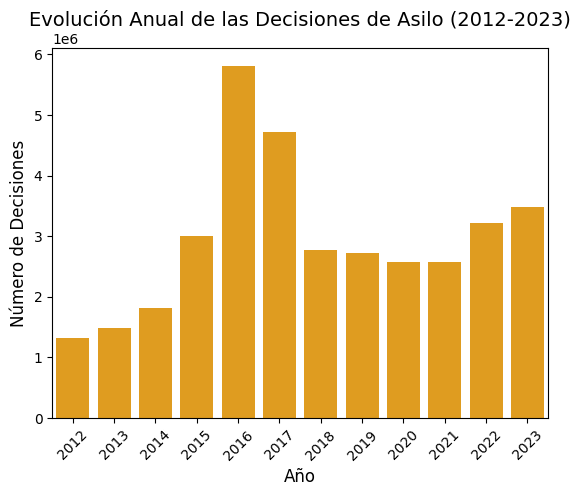

In [ ]:
# Crear el gráfico de barras
sns.barplot(data=totales_anuales, x='TIME_PERIOD', y='OBS_VALUE', color='orange')

# Ajustar el título y los ejes
plt.title("Evolución Anual de las Decisiones de Asilo (2012-2023)", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de Decisiones", fontsize=12)

# Girar las etiquetas del eje x
plt.xticks(rotation=45, fontsize=10)

# Mostrar el gráfico
plt.show()

b) Decisiones de asilo por país, barplot y gráfico de mapas

In [ ]:
totales_pais = datos.groupby('geo')['OBS_VALUE'].sum().reset_index()
totales_pais

,geo,OBS_VALUE
0,Austria,777360.0
1,Belgium,632650.0
2,Bulgaria,126860.0
3,Croatia,7180.0
4,Cyprus,117265.0
5,Czechia,29780.0
6,Denmark,155500.0
7,Estonia,20830.0
8,European Union - 27 countries (from 2020),17104570.0
9,Finland,143665.0


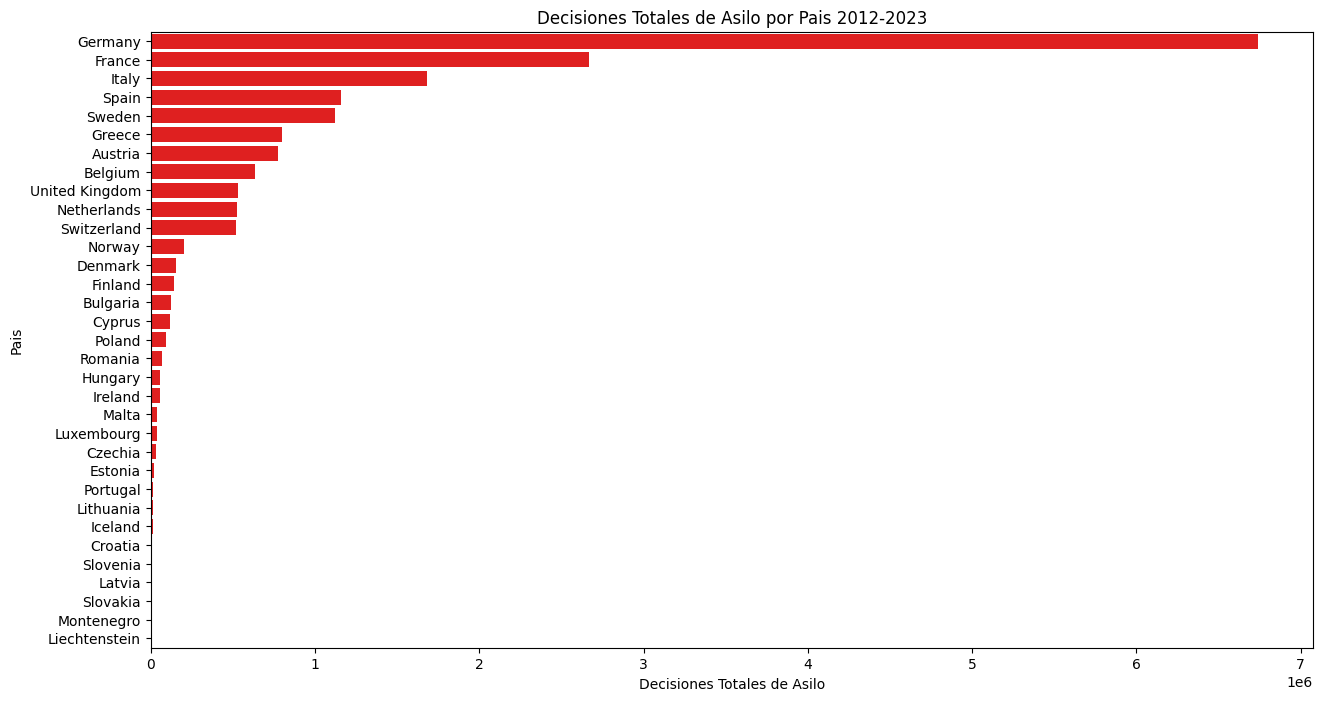

In [ ]:
# Dropeamos la fila que contiene 'European Union - 27 countries (from 2020)' en la columna 'geo'
row_to_drop = totales_pais[totales_pais['geo'] == 'European Union - 27 countries (from 2020)'].index
totales_pais = totales_pais.drop(row_to_drop)

# Ordenamos los países por el total de decisiones
totales_pais_sorted = totales_pais.sort_values('OBS_VALUE', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(15, 8))
sns.barplot(data=totales_pais_sorted, x='OBS_VALUE', y='geo', color='red')
plt.title("Decisiones Totales de Asilo por Pais 2012-2023")
plt.xlabel("Decisiones Totales de Asilo")
plt.ylabel("Pais")
plt.show()

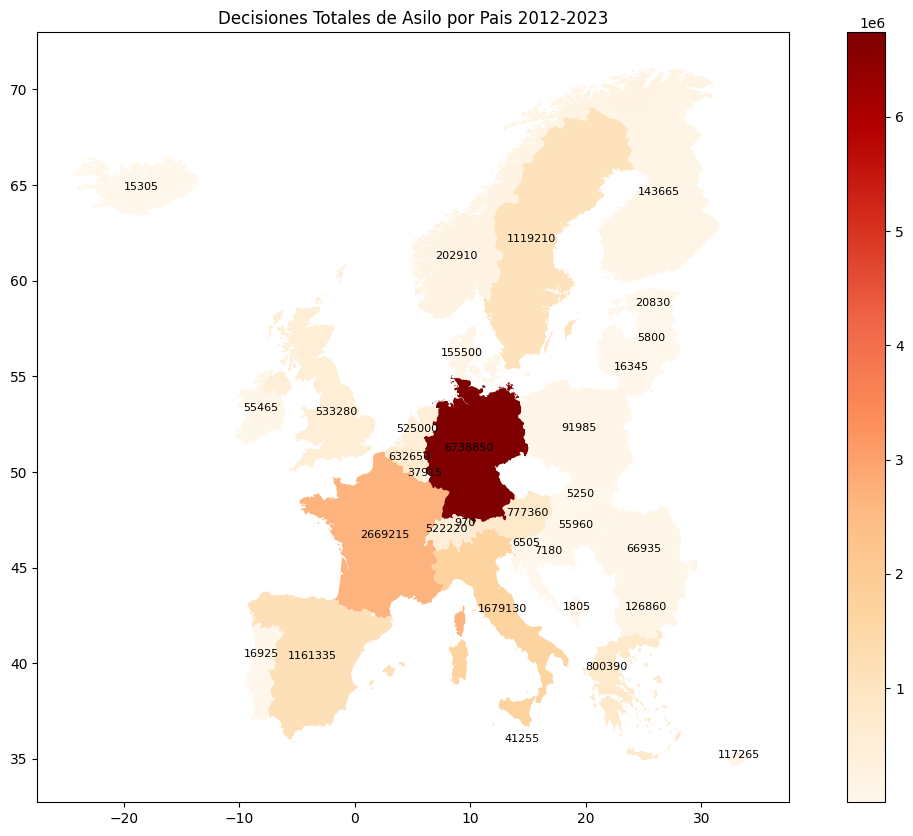

In [ ]:
# juntar por la izq map_europe (NAME) y por la dcha totales_pais (geo) con un inner join:
map_data = pd.merge(map_europe, totales_pais, left_on='NAME', right_on='geo', how='inner')

# cmap='OrRd': orange-red
map_data.plot(column='OBS_VALUE', legend=True, cmap='OrRd', figsize=(15, 10))

# Añadir los valores de OBS_VALUE en el centro de cada país con una etiqueta plt.text
for _, row in map_data.iterrows():
    plt.text(
        row['LON'],
        row['LAT'],
        int(row['OBS_VALUE']),
        fontsize=8,
        ha='center', # alineacion
        color='black'
    )

plt.title("Decisiones Totales de Asilo por Pais 2012-2023")
plt.show()

c) Gráfico 3D y gráfico interactivo para el tipo de decisión en cada año

In [ ]:
decision_year = datos.groupby(['TIME_PERIOD', 'decision'])['OBS_VALUE'].sum().reset_index()
decision_year

,TIME_PERIOD,decision,OBS_VALUE
0,2012,Geneva Convention status,75575.0
1,2012,Humanitarian status,43740.0
2,2012,Rejected,386315.0
3,2012,Subsidiary protection status,64345.0
4,2012,Total,569990.0
...,...,...,...
67,2023,Humanitarian status,159585.0
68,2023,Rejected,642770.0
69,2023,Subsidiary protection status,260990.0
70,2023,Total,1375450.0


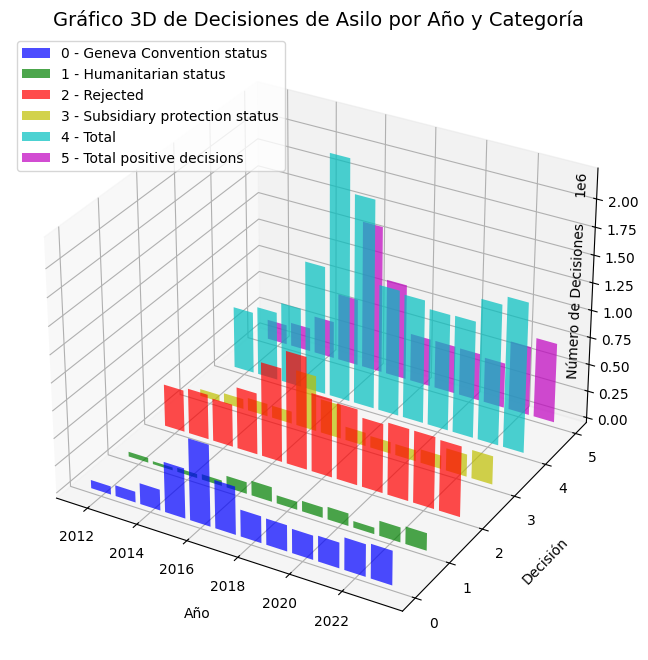

In [ ]:
# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(w=17, h=8)

# Colores para cada decisión
colors = ['b', 'g', 'r', 'y', 'c', 'm', 'orange']
decisions = decision_year['decision'].unique()  # Todas las categorías de decisión
yticks = np.arange(len(decisions))  # Array de índices para el eje Y

# Crear las barras para cada decisión
for i, decision in enumerate(decisions):
    # Filtrar datos para la decisión actual
    datos_decision = decision_year[decision_year['decision'] == decision]

    # Calcular los valores por año:
    xs = datos_decision['TIME_PERIOD'].values # Años
    ys = datos_decision['OBS_VALUE'].values   # Valores observados

    # Ancho de las barras en X
    width = 0.69+0.12

    # Dibujar las barras
    ax.bar(xs, ys, zs=i, zdir='y', color=colors[i], width=width, alpha=0.7, label=f"{i} - {decision}")

# Etiquetas de los ejes
ax.set_xlabel('Año', labelpad=10)
ax.set_ylabel('Decisión', labelpad=10)
ax.set_zlabel('Número de Decisiones', labelpad=-28)

# Configurar etiquetas del eje Y
ax.set_yticks(yticks)

# Título y leyenda
plt.title('Gráfico 3D de Decisiones de Asilo por Año y Categoría', fontsize=14)
ax.legend(loc='upper left')
plt.show()


In [ ]:
# Gráfico interactivo
@interact(decision=decision_year['decision'].unique())
def graficar_decision_anual(decision):
    # Filtrar los datos para la decisión seleccionada
    datos_filtrados = decision_year[decision_year['decision'] == decision]

    # Crear el gráfico
    plt.figure(figsize=(12, 5))
    sns.lineplot(
        data=datos_filtrados,
        x="TIME_PERIOD",
        y="OBS_VALUE",
        marker="o",
        color="orange"
    )

    # Configurar el titulo y ejes
    plt.title(f"Decisión: {decision}", fontsize=16)
    plt.xlabel("Año")
    plt.ylabel("Nº de Decisiones", fontsize=12)
    plt.grid(True)

    # Mostrar todas las etiquetas del eje X
    plt.xticks(
        ticks=datos_filtrados['TIME_PERIOD'].unique(), # Asegurar que cada año tenga un tick
        fontsize=10,                                   # Tamaño de la fuente
        rotation=45                                    # Rotar las etiquetas 45º
    )

    # Mostrar gráfico
    plt.show()

interactive(children=(Dropdown(description='decision', options=('Geneva Convention status', 'Humanitarian stat…

d) Gráfico interactivo para el tipo de decisión en cada país (top 10 países)

In [ ]:
decision_geo = datos.groupby(['geo', 'decision'])['OBS_VALUE'].sum().reset_index()
decision_geo

,geo,decision,OBS_VALUE
0,Austria,Geneva Convention status,123470.0
1,Austria,Humanitarian status,4490.0
2,Austria,Rejected,136225.0
3,Austria,Subsidiary protection status,40330.0
4,Austria,Total,304540.0
...,...,...,...
199,United Kingdom,Humanitarian status,9255.0
200,United Kingdom,Rejected,140530.0
201,United Kingdom,Subsidiary protection status,3430.0
202,United Kingdom,Total,224610.0


In [ ]:
# Gráfico interactivo
@interact(decision=decision_geo['decision'].unique())
def graficar_decision_pais(decision):
    # Filtrar los datos para la decisión seleccionada
    datos_filtrados = decision_geo[
        (decision_geo['decision'] == decision) &
        (decision_geo['geo'] != 'European Union - 27 countries (from 2020)')
    ]

    # Seleccionar el Top 10 por OBS_VALUE
    top_10 = datos_filtrados.sort_values("OBS_VALUE", ascending=False).head(10)

    # Crear el gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=top_10,
        x="geo",
        y="OBS_VALUE",
        hue="decision",
        palette="rocket"
    )

    # Ajustar etiquetas
    plt.xticks(rotation=45, fontsize=10)  # Países en vertical

    # Configurar título y ejes
    plt.title(f"Top 10 Países con la Decisión - {decision}", fontsize=16)
    plt.xlabel("País", fontsize=12)
    plt.ylabel("Nº de Decisiones", fontsize=12)

    # Mostrar gráfico
    plt.show()

interactive(children=(Dropdown(description='decision', options=('Geneva Convention status', 'Humanitarian stat…

e) Gráfico interactivo para las decisiones por país y por año

In [ ]:
decision_geo_year = datos.groupby(['geo', 'decision', 'TIME_PERIOD'])['OBS_VALUE'].sum().reset_index()
decision_geo_year.head()

,geo,decision,TIME_PERIOD,OBS_VALUE
0,Austria,Geneva Convention status,2012,2680.0
1,Austria,Geneva Convention status,2013,3160.0
2,Austria,Geneva Convention status,2014,5655.0
3,Austria,Geneva Convention status,2015,12590.0
4,Austria,Geneva Convention status,2016,24685.0


In [ ]:
# Crear una lista de años y países únicos
years = sorted(decision_geo_year['TIME_PERIOD'].unique())
countries = sorted(decision_geo_year['geo'].unique())

# Función interactiva anidada
@interact(
    year=widgets.Dropdown(options=years, description="Año"),
    country=widgets.Dropdown(options=countries, description="País")
)
def graficar_anidado(year, country):
    # Filtrar los datos para el año y país seleccionados
    datos_filtrados = decision_geo_year[
        (decision_geo_year['TIME_PERIOD'] == year) &
        (decision_geo_year['geo'] == country)
    ]

    # Crear el gráfico
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=datos_filtrados,
        x="decision",
        y="OBS_VALUE",
        hue="decision",
        palette="rocket"
    )

    # Ajustar etiquetas
    plt.xticks(rotation=45, fontsize=10) # Decisiones en ángulo

    # Configurar título y ejes
    plt.title(f"Decisiones de Asilo en {country} - {year}", fontsize=16)
    plt.xlabel("Decisión", fontsize=12)
    plt.ylabel("Nº de Decisiones", fontsize=12)

    # Mostrar gráfico
    plt.show()

interactive(children=(Dropdown(description='Año', options=(2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 202…

f) Truco final, final trick: cargar una imagen

In [ ]:
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/imagenes"
os.chdir(path)

In [ ]:
img = cv2.imread('the_end.jpg')

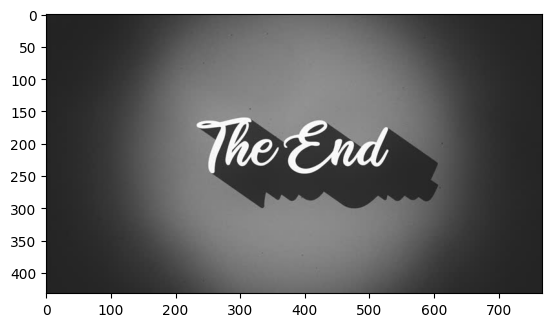

In [ ]:
plt.imshow(img)

In [ ]:
# ¡Gracias y hasta la próxima!